# Experience and Lessons Learned from Using SIMIODE Modeling Scenarios 

###### Ryan Florida, Jeffery Summers, Puran Nepal, Ben Burton and Wandi Ding

In [4]:
# Make all appropriate imports so as to reduce clutter in codes below.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp, log, array, linspace, sum
from numpy.random import random
from multiprocessing import Queue, Process
from math import trunc
import scipy as sp
from scipy.integrate import *
import math
import random as rand
from ipywidgets import interact

#This will standardize all figure sizes.
plt.rcParams["figure.figsize"] = [15,9]

IMPORTANT NOTE: MAKE SURE TO RUN THE ABOVE CODE BEFORE ATTEMPTING TO RUN ANY PROJECT. ALSO, IF YOU RUN PROJECT 3 (EBOLA), YOU WILL NEED TO RUN THE ABOVE CODE AGAIN BEFORE ATTEMPTING TO RUN A DIFFERENT PROJECT.

# Introduction



This notebook details our solutions to various differential equations projects. In many projects, we took multiple approaches by way of numerical methods and implementing popular optimization algorithms.

## Project 1: Disease Spread M&M








For this project we were to study how a disease might spread throughout a community, assuming there were eight infecteds to begin with. The code, below, actually performs the physical aspect of the project for us so that we may perform multiple runs in minimal times. This will also enable others to repeat the experiment and model their own findings.

In [5]:
#!/usr/bin/env python3
#Author:  Ryan Florida
#Purpose: This program simulates our first M&M modeling project, without death
#         and without immigration.
from random import sample

#Some parameters.
NUM_OF_MM    = 63
START        = 8
ROW          = 21
COL          = 16

#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#Class of MM's, this is a simple and unneccessary class, but it aids in
#readability and can be improved upon in order to aid in future generalization.
class MM(object):
    #Tells us if the M&M is infected or not (1 represents infected, 0 represents
    #not). Do not worry too much about the double underscores before and after
    #the variable name, this is just a conventional measure to let the users
    #know that this is private class data.
    __infected__ = 0

################################## Accessors ###################################
    #This method tells us if the current M&M is infected or not.
    def Infected(self):
        return self.__infected__

################################### Mutators ###################################
    #This method infects the current M&M.
    def Infect(self):
        self.__infected__ = 1


#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#This class represents our cup of M&M's
class Cup(object):
    #Here we are just making a list of M&M's, we subtract START from the initial
    #size here because we know there will be that many initial infecteds.
    __candy__ = [MM() for _ in range(NUM_OF_MM - START)]

    #This method represents us tossing the M&M's onto the grid and then removes
    #the infected M&M's.
    def TossCandy(self, grid):
        grid.CountCandy(self)
        self.RemoveInfected(grid)

################################## Accessors ###################################
    #This method just tells us how many susceptibles remain.
    def Size(self):
        return len(self.__candy__)

    #This method yields true when all of our M&M's are infected.
    def IsEmpty(self):
        return self.Size() == 0

################################### Mutators ###################################
    #This method removes the infecteds from the population. There is a very
    #different way to approach this method, but I saw a shortcut, so I took it;
    #my shortcut is the reason we are not actually referencing the MM class
    #objects themselves to test and see which are infected.
    def RemoveInfected(self, grid):
        self.__candy__ = self.__candy__[grid.NumOfInfected():]


#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#Class that creates a ROWxCOL grid
class Grid(object):
    #This is our grid
    __grid__            = [[0]*COL for _ in range(ROW)]
    #This is the number of infected present on the grid.
    __num_of_infected__ = 1
    #This is the toss number that we are on.
    __toss__            = 0
    #This is the number of newly infected M&M's on the grid.
    __newly_infected__  = START + 1
    #This is a table that will be used for a nice display at the end of all
    #tosses.
    __table__           = {}

    #Basic constructor. Here we are just picking START random locations on our
    #grid and assigning them numbers 1 through START.
    def __init__(self):
        initial_spots = sample(range(ROW*COL), START)
        for spot in initial_spots:
            row = spot//COL
            col = spot%COL
            self.__grid__[row][col] = self.__num_of_infected__
            self.__num_of_infected__ += 1
        self.Display()

################################## Accessors ###################################
    #As the name implies, this method just displays our grid.
    def Display(self):
        #print("Grid after %d iteration(s) with %d infecteds"\
        #        %(self.__toss__, self.__num_of_infected__-1))
        self.__table__[self.__toss__] = self.__num_of_infected__ - 1
        #for row in self.__grid__:
        #    for item in row:
        #        print('%-5d' %item, end = '')
        #    print()
        #print()

    #This method just displays our final results.
    def Results(self):
        print("Results:\nIteration")
        print(list(self.__table__.keys()))
        print("\nNumber of infecteds:")
        print(list(self.__table__.values()))

    #This method returns the change in the number of infecteds between each
    #subsequent toss.
    def NumOfInfected(self):
        change = self.__num_of_infected__ - self.__newly_infected__
        self.__newly_infected__ = self.__num_of_infected__
        return change

################################### Mutators ###################################
    #This method will seem overwhelming upon first blush, but just realize that
    #all we are doing is picking a random spot on our grid, then we are
    #checking the spaces on the grid above, below, to the left, and to the
    #right of the square we are currently on. If the current square is
    #infected, then we just randomly move the M&M to the closest available
    #square. I realize the Boolean expression can probably be simplified, but
    #I have not taken the time to do that yet.
    def CountCandy(self, cup):
        self.__toss__ += 1
        positions = sample(range(ROW*COL), cup.Size())
        for position in positions:
            row = position//COL
            col = position%COL
            #Define some Boolean expressions.
            A = col > 0
            B = row > 0
            C = col < COL - 1
            D = row < ROW - 1
            #Testing environment of the current spot on the grid.
            if self.__grid__[row][col] == 0:
                if A and B and C and D:
                    c1 = self.__grid__[row-1][col] != 0
                    c2 = self.__grid__[row+1][col] != 0
                    c3 = self.__grid__[row][col-1] != 0
                    c4 = self.__grid__[row][col+1] != 0
                    if c1 or c2 or c3 or c4:
                        self.__grid__[row][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                elif not A:
                    if B and D:
                        c1 = self.__grid__[row-1][col] != 0
                        c2 = self.__grid__[row+1][col] != 0
                        c3 = self.__grid__[row][col+1] != 0
                        if c1 or c2 or c3:
                            self.__grid__[row][col] = self.__num_of_infected__
                            self.__num_of_infected__ += 1
                    elif not D:
                        c1 = self.__grid__[row-1][col] != 0
                        c2 = self.__grid__[row][col+1] != 0
                        if c1 or c2:
                            self.__grid__[row][col] = self.__num_of_infected__
                            self.__num_of_infected__ += 1
                elif not B:
                    if A and C:
                        c1 = self.__grid__[row+1][col] != 0
                        c2 = self.__grid__[row][col+1] != 0
                        c3 = self.__grid__[row][col-1] != 0
                        if c1 or c2 or c3:
                            self.__grid__[row][col] = self.__num_of_infected__
                            self.__num_of_infected__ += 1
                    elif not C:
                        c1 = self.__grid__[row+1][col] != 0
                        c2 = self.__grid__[row][col-1] != 0
                        if c1 or c2:
                            self.__grid__[row][col] = self.__num_of_infected__
                            self.__num_of_infected__ += 1
                elif not C:
                    if B and D:
                        c1 = self.__grid__[row-1][col] != 0
                        c2 = self.__grid__[row+1][col] != 0
                        c3 = self.__grid__[row][col-1] != 0
                        if c1 or c2 or c3:
                            self.__grid__[row][col] = self.__num_of_infected__
                            self.__num_of_infected__ += 1
                    elif not D:
                        c1 = self.__grid__[row-1][col] != 0
                        c2 = self.__grid__[row][col-1] != 0
                        if c1 or c2:
                            self.__grid__[row][col] = self.__num_of_infected__
                            self.__num_of_infected__ += 1
                elif A and C and (not D):
                    c1 = self.__grid__[row-1][col] != 0
                    c2 = self.__grid__[row][col-1] != 0
                    c3 = self.__grid__[row][col+1] != 0
                    if c1 or c2 or c3:
                        self.__grid__[row][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                elif not (A or B):
                        c1 = self.__grid__[row+1][col] != 0
                        c2 = self.__grid__[row][col+1] != 0
                        if c1 or c2:
                            self.__grid__[row][col] = self.__num_of_infected__
                            self.__num_of_infected__ += 1

            else:
                if A and B and C and D:
                    if self.__grid__[row-1][col] == 0:
                        self.__grid__[row-1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row][col-1] == 0:
                        self.__grid__[row][col-1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row+1][col] == 0:
                        self.__grid__[row+1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row][col+1] == 0:
                        self.__grid__[row][col+1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                elif B and D and (not C):
                    if self.__grid__[row-1][col] == 0:
                        self.__grid__[row-1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row][col-1] == 0:
                        self.__grid__[row][col-1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row+1][col] == 0:
                        self.__grid__[row+1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                elif B and D and (not A):
                    if self.__grid__[row-1][col] == 0:
                        self.__grid__[row-1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row+1][col] == 0:
                        self.__grid__[row+1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row][col+1] == 0:
                        self.__grid__[row][col+1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                elif (not B) and A and C:
                    if self.__grid__[row][col-1] == 0:
                        self.__grid__[row][col-1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row+1][col] == 0:
                        self.__grid__[row+1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row][col+1] == 0:
                        self.__grid__[row][col+1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                elif (not D) and A and C:
                    if self.__grid__[row-1][col] == 0:
                        self.__grid__[row-1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row][col-1] == 0:
                        self.__grid__[row][col-1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row][col+1] == 0:
                        self.__grid__[row][col+1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                elif not (B or C):
                    if self.__grid__[row][col-1] == 0:
                        self.__grid__[row][col-1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row+1][col] == 0:
                        self.__grid__[row+1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                elif not (B or D):
                    if self.__grid__[row-1][col] == 0:
                        self.__grid__[row-1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row][col+1] == 0:
                        self.__grid__[row][col+1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                elif not (A or B):
                    if self.__grid__[row+1][col] == 0:
                        self.__grid__[row+1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row][col+1] == 0:
                        self.__grid__[row][col+1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                elif not (C or D):
                    if self.__grid__[row-1][col] == 0:
                        self.__grid__[row-1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row][col-1] == 0:
                        self.__grid__[row][col-1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1

        self.Display()

#*******************************************************************************
#0: Main
def main():
    #Create instance of Grid class
    grid = Grid()
    #Create instance of Cup class
    cup  = Cup()

    #While there are M&M's in the cup, toss them.
    while not cup.IsEmpty():
        cup.TossCandy(grid)

    grid.Results()


#Call Main.
main()

Results:
Iteration
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

Number of infecteds:
[8, 15, 28, 36, 46, 52, 55, 57, 58, 61, 61, 62, 62, 62, 62, 62, 62, 63]


We assumed a logistic model would best describe the data. In order to identify the growth rate term in the logistic model, we took two approaches. The first (below) was to use a combination of the Bisection method and Newton's method in order to minimize a least squares function. The second approach was to use the simulated annealing algorithm to perform the same optimization.

Find root? (1 for yes, 0 for no) 1
Beginning Error: 99.0878833765

K value: 62.0 p0 value: 8.0 r value: 0.643538933499
****************************************************************
Ending Error: 41.5425106333
Change in error: -57.5453727432


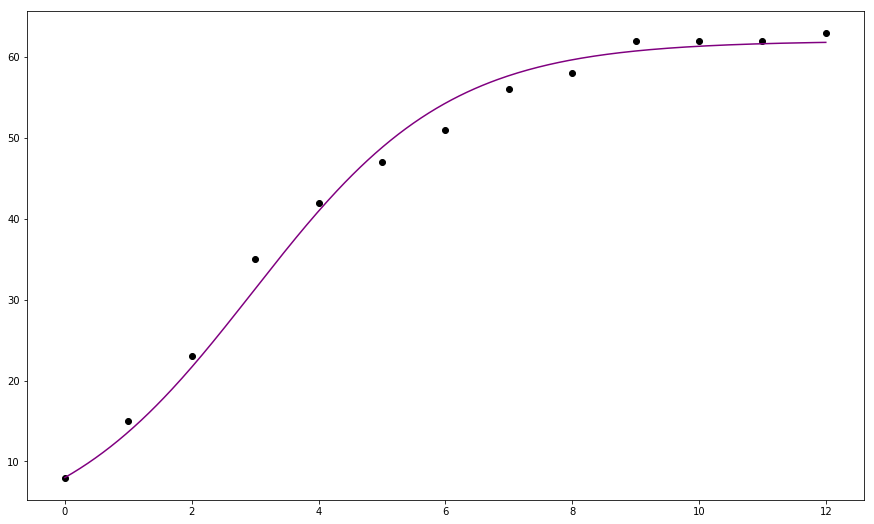

In [6]:
#Author:  Ryan Florida
#Purpose: This is a program template that will fit specified curve to data
#         using a combination of the Bisection Method and Newton's Method.
 
#Constant to determine how many bisections and recursive calls to perform.
RANGE = 20

 
#******************************************************************************
#0: Main.
def main():
    x, y, K, p0, r, file = ReadFile()
    x = array(([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))
    y = array([8, 15, 23, 35, 42, 47, 51, 56, 58, 62, 62, 62, 63])

    Plot(x,y,1)
 
    #Curve to fit.
    Fxn = lambda t : K*p0/(p0+(K-p0)*exp(-r*t))
 
    #Check if training is necessary, if so then the data will be trained.
    if int(input("Find root? (1 for yes, 0 for no) ")):
        e1 = Error(x, y, Fxn)
        r_low = r_high = r
        #If the derivative of the sum of squares function is already zero, we
        #are done.
        if f(r, x, y, p0, K) == 0:
            Plot(x,Fxn,0,1)
            exit()
        #Find appropriate values to use for bisection.
        while f(r_low, x, y, p0, K) > 0:
            r_low -= 0.5
        while f(r_high, x, y, p0, K) < 0:
            r_high += 0.5
        #Use Bisection Method to find seed value for Newton's Method.
        r = Bisect(r_low, r_high, x, y, p0, K)
        #Use Newton's Method to find most accurate root value.
        r = Newton(r, x, y, p0, K)
 
        #Redifine our function with new r value.
        Fxn = lambda t : K*p0/(p0+(K-p0)*exp(-r*t))
 
        #Display values for user.
        print("\nK value:", K, "p0 value:", p0, "r value:", r)
        print('*'*64)
        e2 = Error(x, y, Fxn, 1)
        delta_E = e2 - e1
        print("Change in error:", delta_E)
        if delta_E > 0:
            print("NOTE: ERROR HAS INCREASED")
        Plot(x,Fxn,0,1)
#         replace = int(input("Are the values sufficient? 1 for yes, 0 for no: "))
#         if replace:
#             OverwriteFile(fileName, K, p0, r)
 
    else:
        #Plot function with unmodified values..
        print("Current values and output:\nK value:", K, "\np0 value:", p0,\
                "\nr value:", r)
        Plot(x,Fxn,0,1)
 
#******************************************************************************
#1: Read in user-selected file to initialize arrays.
'''
Note that, at present, this program is only designed to handle 2-tuples
of data.
*******************GENERIC FILE FORMAT (should be a .csv) below*****************
K, p0, r
val_00, val_01
val_10, val_11
val_20, val_21
.
.
.
Val_N0, val_N1
'''
def ReadFile():
    x = []
    y = []
    fileName = 'mm.csv'
    inFile = open(fileName, 'r')
    old_data = inFile.readline()
    K, p0, r = old_data.split(sep = ',')
    K, p0, r = float(K), float(p0), float(r)
    for line in inFile:
        vals = line.split(sep = ',')
        x.append(float(vals[0]))
        y.append(float(vals[1]))
    #x = array(x)
    #y = array(y)
    #Plot(x,y,1)
    inFile.close()
    return x, y, K, p0, r, fileName
 
#******************************************************************************
#2: Calculate sum of squares error.
def Error(x, y, F, new=0):
    y_p = array([F(x_i) for x_i in x])
    error = 0.0
    for i in range(len(y)):
        error += (y[i]-y_p[i])**2
    if new:
        print("Ending Error:", error)
    else:
        print("Beginning Error:", error)
    return error
 
#*******************************************************************************
#3: Derivative of the sum of squares function. You are, assumedly, trying to
#   locate a root of this function so as to locate the minimum of the sum of
#   squares function. That being said, you will have to find the derivative
#   of the sum of squares function. I tried to type it out in a way such that,
#   if you would like to modify the equation, you need only mess with the lines
#   between the octothorpes. AlSO BE MINDFUL OF THE LINE CONTINUATION
#   CHARACTERS.
def f(r, t_val, y_val, p0, K):
    return sum([\
# # # # # # # # # # # # # # TYPE YOUR FUNCTION HERE # # # # # # # # # # # # # #
-2*(y -K/(1 + exp(-r*t)*(K - p0)/p0))*K/(1 + exp(-r*t)*(K - p0)/p0)**2*t*exp(  \
-r*t)*(K - p0)/p0                                                              \
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
                for t,y in zip(t_val, y_val)])
 
#*******************************************************************************
#4: Use the bisection method to get a nice seed value for Newton's Method.
def Bisect(lo, hi, t_val, y_val, p0, K):
    for i in range(RANGE):
        mid = (lo + hi) / 2.0
        if f(lo, t_val, y_val, p0, K)*f(hi, t_val, y_val, p0, K) > 0:
            lo = mid
        else:
            hi = mid
    return mid
 
#*******************************************************************************
#5: Use Newton's Method to find accurate root value.
def Newton(r, t_val, y_val, p0, K):
    for i in range(RANGE):
        r -= f(r, t_val, y_val, p0, K)/df(r, t_val, y_val, p0, K)
    return r
 
#******************************************************************************
#6: Overwrites file with new parameters.
# def OverwriteFile(fileName, K, p0, r):
#     K, p0, r     = str(K), str(p0), str(r)
#     read         = open(fileName, 'r')
#     trash        = read.readline()
#     data_to_keep = read.readlines()
#     read.close()
#     overwrite    = open(fileName, 'w')
#     overwrite.write(K+', '+p0+', '+r+'\n')
#     for line in data_to_keep:
#         overwrite.write(line)
#     overwrite.close()
#     print("File successfully updated")
 
#******************************************************************************
#1.1: Plot data points and functions.
def Plot(x_vals, y_vals, scatter=0, show=0):
    if scatter:
        plt.plot(x_vals, y_vals,'ko')
    else:
        X = linspace(min(x_vals), max(x_vals), 300)
        Y = array([y_vals(x) for x in X])
        plt.plot(X, Y, 'purple')
    if show:
        plt.show()
 
#*******************************************************************************
#5.1: Second derivative of the sum of squares function. This is needed for
#     Newton's Method. See notes above (in 2) about modifications.
def df(r, t_val, y_val, p0, K):
    return sum([\
# # # # # # # # # # # # # # TYPE YOUR FUNCTION HERE # # # # # # # # # # # # # #
2*K**2/(1 + exp(-r*t)*(K - p0)/p0)**4*t**2*exp(-r*t)**2*(K - p0)**2/p0**2 - 4* \
(y - K/(1 + exp(-r*t)*(K - p0)/p0))*K/(1 + exp(-r*t)*(K - p0)/p0)**3*t**2*     \
exp(-r*t)**2*(K-p0)**2/p0**2 + 2*(y - K/(1 + exp(-r*t)*(K - p0)/p0))*K/(1 +    \
exp(-r*t)*(K-p0)/p0)**2*t**2*exp(-r*t)*(K - p0)/p0                             \
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
                for t,y in zip(t_val, y_val)])
 
#******************************************************************************
#Call main.
main()

0.5714025946899135


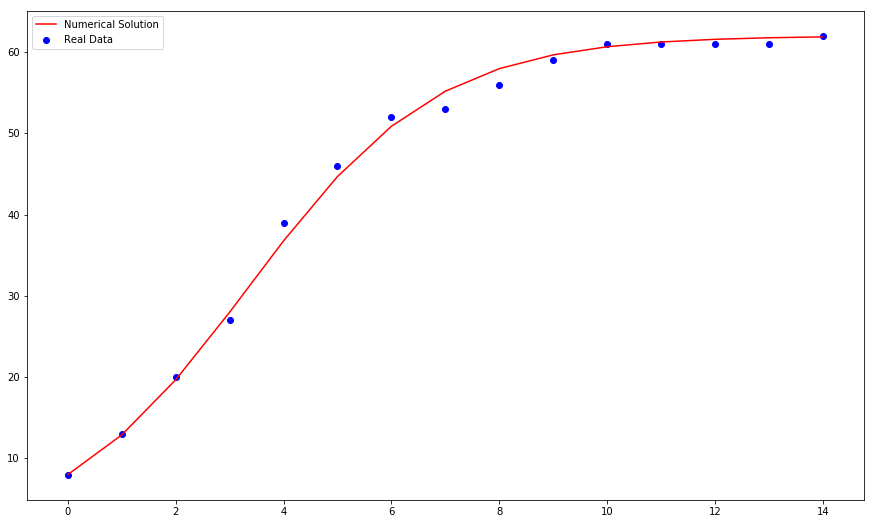

In [7]:
############################################################################################
#   Author:             Jeffery Summers
#   Purpose:            Use simulated annealing to find a the parameter for the logistic
#                       equation
#
#############################################################################################


rand.seed()
 
# Array holding our actual data
p_Array = [8, 13, 20, 27, 39, 46, 52, 53, 56, 59, 61, 61, 61, 61, 62]
# Let the parameter 'r' be initialized to 1
r = 5.78
# The capacity of the population, 'k' is 62
k = 62
# Initialize the array for the solution of the logistic differential equation
y = [8]
# Filling the y array
for i in range(1,15):
    y.append(k/((k-y[0])/(y[0]*math.exp((-1)*r*i))))
 
# Initializing the Least Squares Array
lst_Squares_Array = []*15
for j in range(0, 15):
    lst_Squares_Array.append((y[j]-p_Array[j])**2)
 
# defining the cost function that needs to be minimized
cost = np.sum(lst_Squares_Array)
cost_Array = []
cost_Array.append(cost)
r_Array = []
r_Array.append(r)
 
# This is the primary section that performs the simulated annealing
# Initialize temperature
T = 10000
rand.seed(10)
 
lst_Squares_Array_temp = []
for i in range(1, 50):
    for g in range(0,100):
        r = rand.random()
        ytemp = []
        ytemp.append(y[0])
        for l in range(1, 15):
            ytemp.append(k/((k-ytemp[0])/(ytemp[0]*math.exp((-1)*r*l))))
 
 
        for j in range(0, 15):
            lst_Squares_Array_temp.append((ytemp[j]-p_Array[j])**2)
 
        cost_New = np.sum(lst_Squares_Array_temp)
        if cost_New <= cost:
            cost = cost_New
        elif cost_New >= cost:
            if math.exp((-1)*cost/T) > rand.random():
                cost = cost_New
        else:
            cost = cost
        r_Array.append(r)
        cost_Array.append(cost)
    T = T-200
 
index = int(cost_Array.index(min(cost_Array)))
print(r_Array[index])
r = r_Array[index]
soln = []
 
for i in range(0,15):
    soln.append(k*y[0]/((k-y[0])*math.exp((-1)*r*i)+y[0]))
 
time = []
for i in range(0,15):
    time.append(i)
plt.plot(time,soln,color='red', label='Numerical Solution')
plt.scatter(time,p_Array,color='blue', label='Real Data')
plt.legend()
plt.show()

0.572934681318


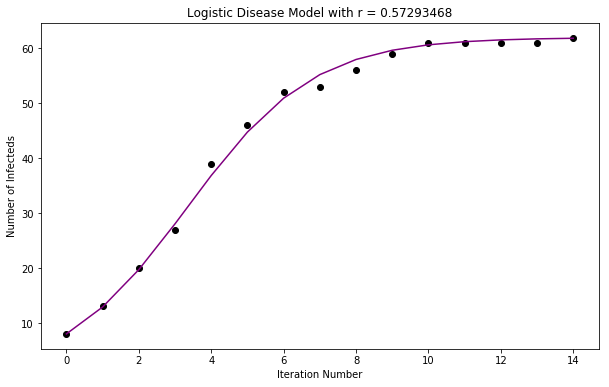

In [1]:
#Author:  Ryan Florida
#Purpose: Use gradient descent (greedy local search) algorithm so as to
#         minimize sum of squares error for the M&M Disease modeling project.
from random import random, seed
from numpy import sum, exp
import matplotlib.pyplot as plt

#This will standardize all figure sizes.
plt.rcParams["figure.figsize"] = [10,6]

#0: Main.
def main():
    #Define Step size, keep this pretty small.
    step    = 1e-5
    #Tolerance.
    epsilon = 1e-10
    #Populate iteration vector.
    x       = [i for i in range(15)]
    #Recorded (experimental) values on each iteration.
    y       = [8, 13, 20, 27, 39, 46, 52, 53, 56, 59, 61, 61, 61, 61, 62]
    #Carrying capacity.
    K       = 62
    #Initial population.
    p0      = y[0]
    #List to hold potential r-values.
    r_vals  = []
    #Define logistic function, sum of squares, and derivative of sum of
    #squares.
    Logistic = lambda r, t: K*p0/(p0 + (K-p0)*exp(-r*t))
    f        = lambda r: sum([(Logistic(r, t) - y[t])**2 for t in x])
    df       = lambda r: sum([2*(Logistic(r, t) - y[t])*K*p0*t*(K-p0)*exp(-r*t)/\
            (p0 + (K - p0)*exp(-r*t))**2 for t in x])
    #Perform gradient descent algorithm 20 times, each time starting at a
    #unique random point.
    for i in range(20):
        seed(i)
        r        = random()
        prev     = f(r)
        gradient = df(r)
        r        -= step*gradient
        while(f(r) - prev > epsilon):
            prev     = f(r)
            gradient = df(r)
            r -= step*gradient
        r_vals += [r]
    #Out of all the local minima, choose the one that minimizes the sum of
    #squares.
    r = Minimum(r_vals, f, x)
    print(r)
    #Plot
    Plot(r, Logistic, x, y)

#1: Loacate value in vec that minimizes fxn.
def Minimum(vec, fxn, x):
    r = vec[0]
    for v in vec[1:]:
        for t in x:
            if fxn(v) < fxn(r):
                r = v
    return r

#2: Plot the input function.
def Plot(r, fxn, x, y):
    plt.scatter(x, y, c='k')
    plt.plot(x, [fxn(r, t) for t in x], c='purple')
    plt.title('Logistic Disease Model with r = %0.8f' %r)
    plt.xlabel('Iteration Number')
    plt.ylabel('Number of Infecteds')
    plt.show()

#Call main.
main()


In [2]:
#!/usr/bin/env python3
#Author:  Ryan Florida
#Purpose: This program simulates our first M&M modeling project, without death
#         and without immigration.
from random import sample

#Some parameters.
NUM_OF_MM    = 63
START        = 8
ROW          = 21
COL          = 16

#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#Class of MM's, this is a simple and unneccessary class, but it aids in
#readability and can be improved upon in order to aid in future generalization.
class MM(object):
    #Tells us if the M&M is infected or not (1 represents infected, 0 represents
    #not). Do not worry too much about the double underscores before and after
    #the variable name, this is just a conventional measure to let the users
    #know that this is private class data.
    __infected__ = 0

################################## Accessors ###################################
    #This method tells us if the current M&M is infected or not.
    def Infected(self):
        return self.__infected__

################################### Mutators ###################################
    #This method infects the current M&M.
    def Infect(self):
        self.__infected__ = 1


#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#This class represents our cup of M&M's
class Cup(object):
    #Here we are just making a list of M&M's, we subtract START from the initial
    #size here because we know there will be that many initial infecteds.
    __candy__ = [MM() for _ in range(NUM_OF_MM - START)]

    #This method represents us tossing the M&M's onto the grid and then removes
    #the infected M&M's.
    def TossCandy(self, grid):
        grid.CountCandy(self)
        self.RemoveInfected(grid)

################################## Accessors ###################################
    #This method just tells us how many susceptibles remain.
    def Size(self):
        return len(self.__candy__)

    #This method yields true when all of our M&M's are infected.
    def IsEmpty(self):
        return self.Size() == 0

################################### Mutators ###################################
    #This method removes the infecteds from the population. There is a very
    #different way to approach this method, but I saw a shortcut, so I took it;
    #my shortcut is the reason we are not actually referencing the MM class
    #objects themselves to test and see which are infected.
    def RemoveInfected(self, grid):
        self.__candy__ = self.__candy__[grid.NumOfInfected():]


#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#Class that creates a ROWxCOL grid
class Grid(object):
    #This is our grid
    __grid__            = [[0]*COL for _ in range(ROW)]
    #This is the number of infected present on the grid.
    __num_of_infected__ = 1
    #This is the toss number that we are on.
    __toss__            = 0
    #This is the number of newly infected M&M's on the grid.
    __newly_infected__  = START + 1
    #This is a table that will be used for a nice display at the end of all
    #tosses.
    __table__           = {}

    #Basic constructor. Here we are just picking START random locations on our
    #grid and assigning them numbers 1 through START.
    def __init__(self):
        initial_spots = sample(range(ROW*COL), START)
        for spot in initial_spots:
            row = spot//COL
            col = spot%COL
            self.__grid__[row][col] = self.__num_of_infected__
            self.__num_of_infected__ += 1
        self.Display()

################################## Accessors ###################################
    #As the name implies, this method just displays our grid.
    def Display(self):
        print("Grid after %d iteration(s) with %d infecteds"\
                %(self.__toss__, self.__num_of_infected__-1))
        self.__table__[self.__toss__] = self.__num_of_infected__ - 1
        for row in self.__grid__:
            for item in row:
                print('%-5d' %item, end = '')
            print()
        print()

    #This method just displays our final results.
    def Results(self):
        print("Table of Results:\nIteration        Number of Infecteds")
        for (iteration, infecteds) in self.__table__.items():
            print("%-23d %2d" %(iteration, infecteds))

    #This method returns the change in the number of infecteds between each
    #subsequent toss.
    def NumOfInfected(self):
        change = self.__num_of_infected__ - self.__newly_infected__
        self.__newly_infected__ = self.__num_of_infected__
        return change

################################### Mutators ###################################
    #This method will seem overwhelming upon first blush, but just realize that
    #all we are doing is picking a random spot on our grid, then we are
    #checking the spaces on the grid above, below, to the left, and to the
    #right of the square we are currently on. If the current square is
    #infected, then we just randomly move the M&M to the closest available
    #square. I realize the Boolean expression can probably be simplified, but
    #I have not taken the time to do that yet.
    def CountCandy(self, cup):
        self.__toss__ += 1
        positions = sample(range(ROW*COL), cup.Size())
        for position in positions:
            row = position//COL
            col = position%COL
            #Define some Boolean expressions.
            A = col > 0
            B = row > 0
            C = col < COL - 1
            D = row < ROW - 1
            #Testing environment of the current spot on the grid.
            if self.__grid__[row][col] == 0:
                if A and B and C and D:
                    c1 = self.__grid__[row-1][col] != 0
                    c2 = self.__grid__[row+1][col] != 0
                    c3 = self.__grid__[row][col-1] != 0
                    c4 = self.__grid__[row][col+1] != 0
                    if c1 or c2 or c3 or c4:
                        self.__grid__[row][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                elif not A:
                    if B and D:
                        c1 = self.__grid__[row-1][col] != 0
                        c2 = self.__grid__[row+1][col] != 0
                        c3 = self.__grid__[row][col+1] != 0
                        if c1 or c2 or c3:
                            self.__grid__[row][col] = self.__num_of_infected__
                            self.__num_of_infected__ += 1
                    elif not D:
                        c1 = self.__grid__[row-1][col] != 0
                        c2 = self.__grid__[row][col+1] != 0
                        if c1 or c2:
                            self.__grid__[row][col] = self.__num_of_infected__
                            self.__num_of_infected__ += 1
                elif not B:
                    if A and C:
                        c1 = self.__grid__[row+1][col] != 0
                        c2 = self.__grid__[row][col+1] != 0
                        c3 = self.__grid__[row][col-1] != 0
                        if c1 or c2 or c3:
                            self.__grid__[row][col] = self.__num_of_infected__
                            self.__num_of_infected__ += 1
                    elif not C:
                        c1 = self.__grid__[row+1][col] != 0
                        c2 = self.__grid__[row][col-1] != 0
                        if c1 or c2:
                            self.__grid__[row][col] = self.__num_of_infected__
                            self.__num_of_infected__ += 1
                elif not C:
                    if B and D:
                        c1 = self.__grid__[row-1][col] != 0
                        c2 = self.__grid__[row+1][col] != 0
                        c3 = self.__grid__[row][col-1] != 0
                        if c1 or c2 or c3:
                            self.__grid__[row][col] = self.__num_of_infected__
                            self.__num_of_infected__ += 1
                    elif not D:
                        c1 = self.__grid__[row-1][col] != 0
                        c2 = self.__grid__[row][col-1] != 0
                        if c1 or c2:
                            self.__grid__[row][col] = self.__num_of_infected__
                            self.__num_of_infected__ += 1
                elif A and C and (not D):
                    c1 = self.__grid__[row-1][col] != 0
                    c2 = self.__grid__[row][col-1] != 0
                    c3 = self.__grid__[row][col+1] != 0
                    if c1 or c2 or c3:
                        self.__grid__[row][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                elif not (A or B):
                        c1 = self.__grid__[row+1][col] != 0
                        c2 = self.__grid__[row][col+1] != 0
                        if c1 or c2:
                            self.__grid__[row][col] = self.__num_of_infected__
                            self.__num_of_infected__ += 1

            else:
                if A and B and C and D:
                    if self.__grid__[row-1][col] == 0:
                        self.__grid__[row-1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row][col-1] == 0:
                        self.__grid__[row][col-1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row+1][col] == 0:
                        self.__grid__[row+1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row][col+1] == 0:
                        self.__grid__[row][col+1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                elif B and D and (not C):
                    if self.__grid__[row-1][col] == 0:
                        self.__grid__[row-1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row][col-1] == 0:
                        self.__grid__[row][col-1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row+1][col] == 0:
                        self.__grid__[row+1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                elif B and D and (not A):
                    if self.__grid__[row-1][col] == 0:
                        self.__grid__[row-1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row+1][col] == 0:
                        self.__grid__[row+1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row][col+1] == 0:
                        self.__grid__[row][col+1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                elif (not B) and A and C:
                    if self.__grid__[row][col-1] == 0:
                        self.__grid__[row][col-1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row+1][col] == 0:
                        self.__grid__[row+1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row][col+1] == 0:
                        self.__grid__[row][col+1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                elif (not D) and A and C:
                    if self.__grid__[row-1][col] == 0:
                        self.__grid__[row-1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row][col-1] == 0:
                        self.__grid__[row][col-1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row][col+1] == 0:
                        self.__grid__[row][col+1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                elif not (B or C):
                    if self.__grid__[row][col-1] == 0:
                        self.__grid__[row][col-1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row+1][col] == 0:
                        self.__grid__[row+1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                elif not (B or D):
                    if self.__grid__[row-1][col] == 0:
                        self.__grid__[row-1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row][col+1] == 0:
                        self.__grid__[row][col+1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                elif not (A or B):
                    if self.__grid__[row+1][col] == 0:
                        self.__grid__[row+1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row][col+1] == 0:
                        self.__grid__[row][col+1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                elif not (C or D):
                    if self.__grid__[row-1][col] == 0:
                        self.__grid__[row-1][col] = self.__num_of_infected__
                        self.__num_of_infected__ += 1
                    elif self.__grid__[row][col-1] == 0:
                        self.__grid__[row][col-1] = self.__num_of_infected__
                        self.__num_of_infected__ += 1

        self.Display()

#*******************************************************************************
#0: Main
def main():
    #Create instance of Grid class
    grid = Grid()
    #Create instance of Cup class
    cup  = Cup()

    #While there are M&M's in the cup, toss them.
    while not cup.IsEmpty():
        cup.TossCandy(grid)

    #Display the results.
    grid.Results()


#Call Main.
main()


Grid after 0 iteration(s) with 8 infecteds
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    2    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    4    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    8    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    6    0    0    0    0    0    0    0    0    0    0    0    0

0    0    0    0    0    50   0    0    0    0    26   48   0    0    0    0    
0    0    0    0    25   13   0    0    0    54   15   0    0    55   24   0    
0    0    0    0    21   3    22   36   0    53   1    0    0    27   7    0    
0    0    0    0    39   10   0    40   43   0    0    0    0    0    49   0    
0    0    0    0    0    0    0    0    44   0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    

Grid after 8 iteration(s) with 60 infecteds
0    0    0    0    0    0    0    0    0    0    0    0    0    57   51   0    
0    0    0    0    0    0    0    0    0    0    0    0    0    33   37   0    
0    0    0    0    0    0    0    0    0    0    0    0    0    14   16   29   
0    0    0    0    0    0    0    38   0    0    0    0    0    2    42   52   
0    0    0    0    0    0    46   35   0    0    0    0    0   

## Project 2: M&M Death & Immigration

This is essentially the same as project 1, except we include death and immigration into the model.

In [14]:
#Author:  Ryan Florida
#Purpose: The purpose of this program is to simulate the MM-DeathImmigration
#         project.
from random import randint

#Some parameters.
NUM_OF_MM    = 50
NUM_OF_ITERS = 20

#Class of MM's, this is a simple class but it aids in readability.
class MM(object):
    #Tells us if the M&M is dead or alive (1 represents living, 0 represents
    #dead). Do not worry too much about the double underscores before and after
    #the variable name, this is just a conventional measure to let the users
    #know that this is private class data.
    __life__ = 1

################################## Accessors ###################################
    #This method tells us if the current M&M is dead or alive.
    def Living(self):
        return self.__life__

################################### Mutators ###################################
    #This method kills the current M&M.
    def Kill(self):
        self.__life__ = 0


#*******************************************************************************
#0: Main
def main():
    print('EXPERIMENT Part 1 RESULTS:')
    ExperimentPart1()
    print('EXPERIMENT Part 2 RESULTS:')
    ExperimentPart2()

#*******************************************************************************
#1: Run the first part of the experiment. This entails throwing a cup full of
#   M&M's and discarding those that 'die'.
def ExperimentPart1():
    #Fill cup with a given number of M&M's
    cup_of_MMs = [MM() for i in range(NUM_OF_MM)]
    iterNum = 0
    print('Iteration'+' '*5 +'Number of M&Ms at start of iteration\n'+'-'*50)
    while(cup_of_MMs != []):
        print('%-3s %-24d %d' %(' ', iterNum, len(cup_of_MMs)))
        TossCandy(cup_of_MMs)
        RemoveDead(cup_of_MMs)
        iterNum += 1

#*******************************************************************************
#2: Run the second part of the experiment. This entails throwing a cup full of
#   M&M's, discarding those that 'die', and then adding in ten additional M&M's
#   to account for immigration into the population.
def ExperimentPart2():
    cup_of_MMs = [MM() for i in range(NUM_OF_MM)]
    print('Iteration'+' '*5 +'Number of M&Ms at start of iteration\n'+'-'*50)
    for i in range(NUM_OF_ITERS):
        print('%-3s %-24d %d' %(' ', i, len(cup_of_MMs)))
        TossCandy(cup_of_MMs)
        RemoveDead(cup_of_MMs)
        AddTen(cup_of_MMs)

#*******************************************************************************
#1.1: This function simulates throwing the M&M's from the cup and those that
#     have their 'm' face up are killed off.
def TossCandy(cup):
    for mm in cup:
        if randint(0,100)%2 == 1:
            mm.Kill()

#*******************************************************************************
#1.2: This function removes the "dead" M&M's from the population.
def RemoveDead(cup):
    for mm in cup[:]:
        if not mm.Living():
            cup.remove(mm)

#*******************************************************************************
#2.1: This function just adds 10 new M&M's to our cup.
def AddTen(cup):
    cup += [MM() for i in range(10)]

#Call Main.
main()


EXPERIMENT Part 1 RESULTS:
Iteration     Number of M&Ms at start of iteration
--------------------------------------------------
    0                        50
    1                        24
    2                        11
    3                        8
    4                        5
    5                        1
EXPERIMENT Part 2 RESULTS:
Iteration     Number of M&Ms at start of iteration
--------------------------------------------------
    0                        50
    1                        35
    2                        28
    3                        25
    4                        23
    5                        17
    6                        17
    7                        19
    8                        21
    9                        24
    10                       19
    11                       16
    12                       22
    13                       25
    14                       26
    15                       27
    16                       23
    17   

## Project 3: Ebola 

For this project, we analyze Ebola using the SEIR model. We will also introduce an optimal control.

<IPython.core.display.Javascript object>


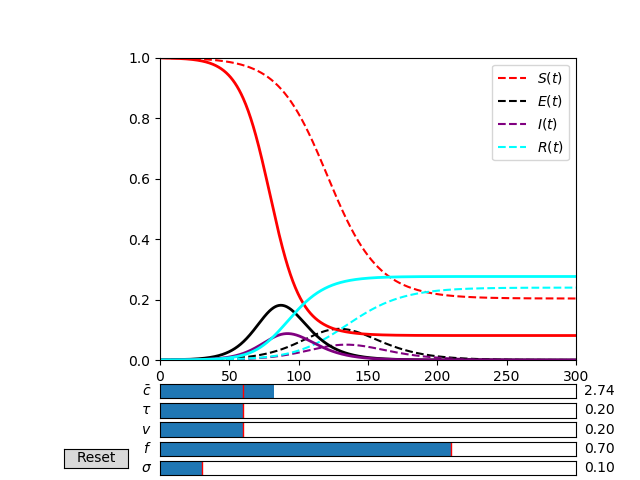

In [1]:
#Author:  Ryan Florida
#Purpose: This program will first solve a coupled system of differential
#         equations (SEIR model for Ebola), then allow the user to adjust
#         the parameter values to see how each paramter affects the solution
#         of the system.
%matplotlib notebook
from matplotlib.widgets import Slider, Button
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# The following function makes a vector of differential equations to represent the
# coupled system of differential equations. The *args parameter allows the
# function to accept a variable number of arguments, which is conventient for our
# purposes. Inside the dydt list, enter each differential equation as its own
# entry and note that order does matter.
def DESys(y, *args):
    S, E, I, R = y
    dydt = [-beta*S*I, beta*S*I-sigma*E, sigma*E-v*I, v*(1-f)*I]
    return dydt

# The following function defines the action(s) to take when the graph sliders
# are varied.
def sliders(val):
    global beta
    global sigma
    global v
    global f
    #Set new values for global variables.
    (beta, sigma, v, f) = (c_slider.val*tau_slider.val, sigma_slider.val,
     v_slider.val, f_slider.val)
    #Change y-values.
    line0.set_ydata(odeint(DESys, y0, t, args=(beta, sigma, v, f))[:,0])
    line1.set_ydata(odeint(DESys, y0, t, args=(beta, sigma, v, f))[:,1])
    line2.set_ydata(odeint(DESys, y0, t, args=(beta, sigma, v, f))[:,2])
    line3.set_ydata(odeint(DESys, y0, t, args=(beta, sigma, v, f))[:,3])
    fig.canvas.draw_idle()

# The following function resets each slider upon press of the 'Reset' button.
def reset_button_action(mouse_event):
    c_slider.reset()
    tau_slider.reset()
    f_slider.reset()
    v_slider.reset()
    sigma_slider.reset()


###############################################################################
# Here we will define all of our paramters. *NOTE THAT THESE ARE GLOBAL*
tau   = 0.2
c     = 2.0
beta  = tau*c
sigma = 0.1
v     = 0.2
f     = 0.7

# Here is a list containing our initial conditions, remember that order matters.
y0 = [0.999, 0.0002, 0.0002, 0.0006]

# Here we will let the time vary from 0 to 300 with 1000 points defined.
t = np.linspace(0, 300, 1000)

# soln will represent the vector of solutions, the system will be solved using
# SciPy's odeint method.
soln = odeint(DESys, y0, t, args=(beta, sigma, v, f))


# Create a figure to plot.
fig = plt.figure()
ax  = fig.add_subplot(111)
# Adjust the plotting region to make room for sliders and button.
fig.subplots_adjust(left=0.25, bottom=0.25)

# Draw the initial plot (as dashed lines) so it will stick around as the
# sliders are varied.
ax.plot(t, soln[:,0],'r--', label = '$S(t)$')
ax.plot(t, soln[:,1],'k--', label = '$E(t)$')
ax.plot(t, soln[:,2],c='purple',linestyle='--', label = '$I(t)$')
ax.plot(t, soln[:,3],c='cyan',linestyle='--', label = '$R(t)$')
[line0] = ax.plot(t, soln[:, 0], linewidth=2, color='red')
[line1] = ax.plot(t, soln[:, 1], linewidth=2, color='black')
[line2] = ax.plot(t, soln[:, 2], linewidth=2, color='purple')
[line3] = ax.plot(t, soln[:, 3], linewidth=2, color='cyan')
ax.set_xlim([0, 300])
ax.set_ylim([0, 1.0])


# Place sliders on graph (one for each parameter).
c_slider_ax  = fig.add_axes([0.25, 0.17, 0.65, 0.03])
c_slider     = Slider(c_slider_ax, '$\\bar{c}$', 0.0, 10.0, valinit=c)

tau_slider_ax = fig.add_axes([0.25, 0.13, 0.65, 0.03])
tau_slider    = Slider(tau_slider_ax, '$\\tau$', 0.0, 1.0, valinit=tau)

v_slider_ax = fig.add_axes([0.25, 0.09, 0.65, 0.03])
v_slider    = Slider(v_slider_ax, '$v$', 0.0, 1.0, valinit=v)

f_slider_ax = fig.add_axes([0.25, 0.05, 0.65, 0.03])
f_slider    = Slider(f_slider_ax, '$f$', 0.0, 1.0, valinit=f)

sigma_slider_ax = fig.add_axes([0.25, 0.01, 0.65, 0.03])
sigma_slider    = Slider(sigma_slider_ax, '$\sigma$', 0.0, 1.0, valinit=sigma)

# Call sliders function for each slider.
c_slider.on_changed(sliders)
tau_slider.on_changed(sliders)
f_slider.on_changed(sliders)
v_slider.on_changed(sliders)
sigma_slider.on_changed(sliders)

# Add a button for resetting the parameters.
reset_button_ax = fig.add_axes([0.1, 0.025, 0.1, 0.04])
reset_button    = Button(reset_button_ax, 'Reset')

# Call reset button function.
reset_button.on_clicked(reset_button_action)
# Show plot with legend.
ax.legend()
plt.show()

## Project 4: Malaria Control 

Enter number of days: 30
Enter number of doses missed (0, 1, or 2): 0


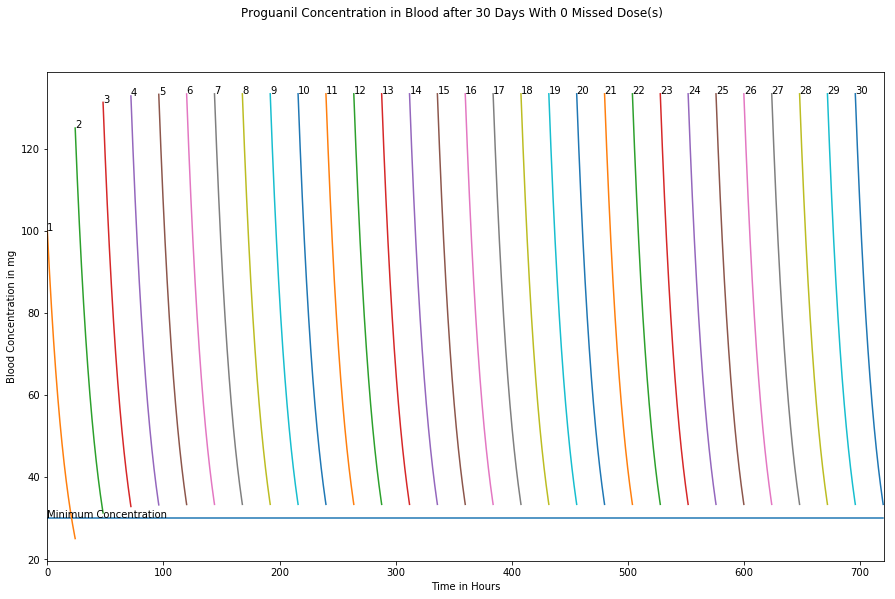

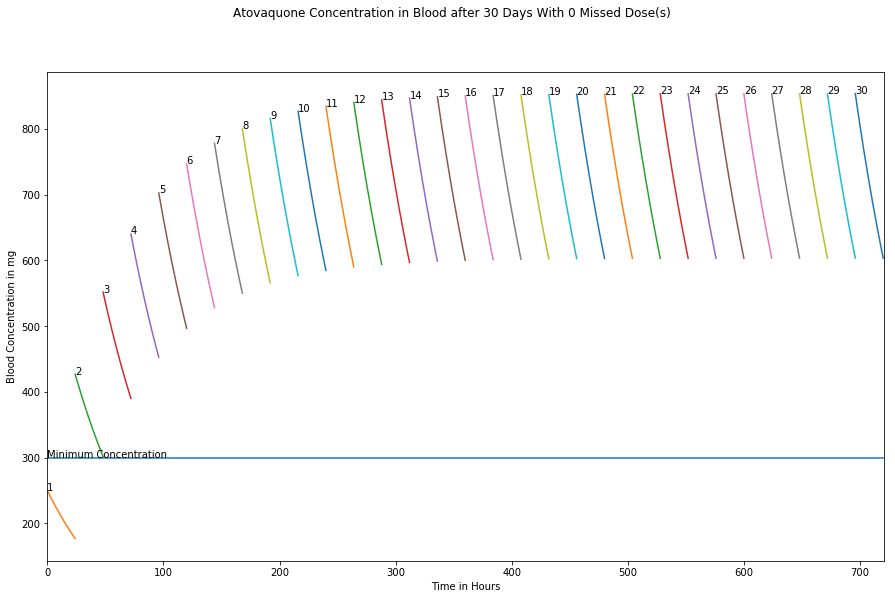

In [16]:
#Author:  Ryan Florida
#Purpose: Attempt at modelling concentration of two particular drugs, Proguanil
#         and Atovaquone, in the blood stream during a given number of days.
    
#Constant
EPSILON = 1e-4
 
#******************************************************************************
#0: Main.
def main():
    days = int(input("Enter number of days: "))
    dosesMissed = int(input("Enter number of doses missed (0, 1, or 2): "))
    t_vals = linspace(0, days*24, 200)
 
    plot(t_vals, 100, 12, 30, "Proguanil", dosesMissed)
    plot(t_vals, 250, 48, 300, "Atovaquone", dosesMissed)
 
 
#******************************************************************************
#1: Plot function with desired parameters.
def plot(t_vals, initial, half_life, threshold, title, dosesMissed):
    numOfDays = int(max(t_vals)/24)
    missedDay = False
 
    #Plot minimum concentration allowed as well as labelling the graph and
    #axes and constraining the x axis.
    plt.annotate("Minimum Concentration", xy = (0, threshold),xytext =\
            (0, threshold))
    plt.plot(t_vals, array([threshold for t in range(len(t_vals))]))
    plt.suptitle("%s Concentration in Blood after %d Days With %d Missed\
 Dose(s)" %(title, numOfDays, dosesMissed))
    plt.xlabel("Time in Hours")
    plt.ylabel("Blood Concentration in mg")
    plt.xlim(0,t_vals[-1]+1)
 
    #Plot curves representing concentration in the blood each 24 hour period.
    for i in range(numOfDays):
        #Here we check for any missed doses and assign the appropriate value
        #to the missed day variable.
        if (dosesMissed == 2 and i == numOfDays - 2) or (dosesMissed == 1 and\
                i == numOfDays - 1):
            missedDay = i + 1
        elif dosesMissed == 2 and i == numOfDays - 1:
            missedDay = i
        #Each interval is split up into 24-hour bins.
        interval_i = linspace(i*24, (i+1)*24 - EPSILON, 200)
        #Calculate the function on the ith interval.
        fxn = decay(interval_i, initial, half_life, missedDay)
 
        #This is just for readability of the graph.
        if numOfDays <= 10:
            plt.annotate('Day'+str(i+1), xy = (interval_i[0], fxn[0]),\
                    xytext =(interval_i[0]+EPSILON, fxn[0]+EPSILON))
        elif numOfDays <= 30:
            plt.annotate(str(i+1), xy = (interval_i[0], fxn[0]),\
                    xytext =(interval_i[0]+EPSILON, fxn[0]+EPSILON))
        #Plot the function values.
        plt.plot(interval_i, fxn, label='Day' + str(i))
 
    #Display plot.
    plt.show()
 
#******************************************************************************
#2: Parallelize
def Compute(low, high, q):
    numOfPrimes = 0
    for num in range(low, high+1):
        if IsPrime(num):
            numOfPrimes += 1
    q.put(numOfPrimes)
 
#******************************************************************************
#3: Exponential decay function.
def decay(t, initial, half_life, missedDay):
    T = []
    if not missedDay:
        for x in t:
            r = 0
            for n in range(trunc(x/24) + 1):
                r += initial*exp(-log(2)*(x - 24*n)/half_life)
            T.append(r)
 
    else:
        for x in t:
            r = 0
            for n in range(missedDay-1):
                r += initial*exp(-log(2)*(x-24*n)/half_life)
            T.append(r)
 
    return(T)
 
#Call main.
main()

## Project 5: Logistic Population Growth 

Is training required? 1 for yes, 0 for no: 0
Current values and output:
K value: 12.6928757026 
p0 value: 0.05 
r value: 0.376883782749


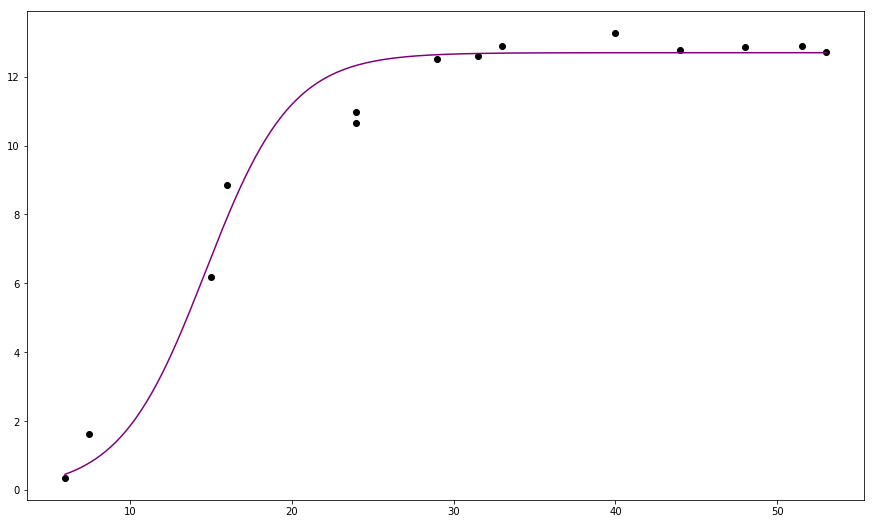

In [8]:
#Author:  Ryan Florida
#Purpose: This is a program template that will fit a logistic curve to any data
#         set using the method of gradient descent. Note that this program does
#         require that you make a .csv file containing your data. The format of
#         the file is specified in the ReadFile function (#1) below. Also be
#         aware that this program will optimize the curve for all three
#         parameters: the carrying capacity, the steepness of the curve, and
#         the initial population. If there is a parameter that you do not wish
#         to optimize, then the easiest thing to do would be to hardcode your
#         value for that right before the final plot is generated. Be aware
#         that some data sets may require multiple training sessions.
 
'''* * * * * * * * * * * * * * * READ THIS * * * * * * * * * * * * * * * * * * *
IMPORTANT: If you train your data multiple times, make sure to back up your
input file if it has valuable parameters that you like because training and
accepting the new data will overwrite your old data file.
'''

#******************************************************************************
#0: Main.
def main():
    #Fill data arrays.
    x, y, K, p0, r, fileName = ReadFile()
 
    #Logistic function.
    sigmoid = lambda t : K*p0/(p0+(K-p0)*exp(-r*t))
 
    #Check if training is necessary, if so then the data will be trained.
    if int(input("Is training required? 1 for yes, 0 for no: ")):
        e1 = Error(x,y,sigmoid)
        #Change the 0 to a 1 or True as the 9th argument below if you would like to modify all parameters.
        Train(x, y, K, p0, r, sigmoid, fileName, e1, 1)
 
    else:
        #Plot sigmoid.
        print("Current values and output:\nK value:", K, "\np0 value:", p0,\
                "\nr value:", r)
        plot(x,sigmoid,0,1)
        
#******************************************************************************
#1: Read in user-selected file to initialize arrays.
'''
Note that, at present, this program is only designed to handle 2-tuples
of data.
*******************GENERIC FILE FORMAT (should be a .csv) below*****************
K, p0, r
val_00, val_01
val_10, val_11
val_20, val_21
.
.
.
Val_N0, val_N1
'''
def ReadFile():
    x = []
    y = []
    
    #Available file names are 'sac1_t.csv', 'sac2_t.csv', 'sch1_t.csv', and 'sch2_t.csv'
    fileName = 'sac1_t.csv'
    
    inFile = open(fileName, 'r')
    old_data = inFile.readline()
    K, p0, r = old_data.split(sep = ',')
    K, p0, r = float(K), float(p0), float(r)
    for line in inFile:
        vals = line.split(sep = ',')
        x.append(float(vals[0]))
        y.append(float(vals[1]))
    x = array(x)
    y = array(y)
    plot(x,y,1)
    inFile.close()
    return x, y, K, p0, r, fileName
 
#******************************************************************************
#2: Calculate sum of squares error.
def Error(x, y, sigmoid, new=0):
    y_p = array([sigmoid(x_i) for x_i in x])
    error = 0.0
    for i in range(len(y)):
        error += (y[i]-y_p[i])**2
    if new:
        print("Ending Error:", error)
    else:
        print("Beginning Error:", error)
    return error
 
#******************************************************************************
#3: Trains parameters so that sigmoid curve will fit the data.
def Train(x, y, K, p0, r, sigmoid, fileName, e1, triple=0):
    '''
    The arguments in the function, in the order they appear, are the x-values,
    the y-values, the carrying capacity, the initial population, the steepness
    of the curve, the sigmoid function itself, the name of the file from which
    the data are read, the error associated with the data before any training
    has been done, and if the gradient should optimize all three parameters. If
    you would only like to optimize two parameters, namely K and r, then change
    change triple to 0 here.
    '''
    print("Training ...")
    #Speed at which the algorithm will train.
    #Slower rate => better results and longer computation time.
    #If you have a particularly unruly data set, you may want to change this
    #to a value of 1e-1 or 1 until the curve becomes somewhat well-behaved.
    train_rate     = 1e-5
 
    #Training phase.
    pound = 0
    if triple:
        for i in range(int(3e5) + 1):
            w8_1, w8_2, w8_3 = GetWeights(x, y, K, p0, r, triple)
            K               -= train_rate*w8_1
            r               -= train_rate*w8_2
            p0              -= train_rate*w8_3
            if i%1e4 == 0 and i != 0:
                percent = i/3e5
                pound += 1
                print('['+'#'*pound + ' '*(30-pound) + ']',\
                        "{:2.1%}".format(percent), end='\r' )
                if i%1e5 == 0:
                    train_rate /= 10
    else:
        for i in range(int(3e5) + 1):
            w8_1, w8_2 = GetWeights(x, y, K, p0, r)
            K               -= train_rate*w8_1
            r               -= train_rate*w8_2
            if i%1e4 == 0 and i != 0:
                percent = i/3e5
                pound += 1
                print('['+'#'*pound + ' '*(30-pound) + ']',\
                        "{:2.1%}".format(percent), end='\r' )
                if i%1e5 == 0:
                    train_rate /= 10
    print()
 
    sigmoid = lambda t : K*p0/(p0+(K-p0)*exp(-r*t))
    print("\n***********************Training Complete!***********************")
 
    #Display values for user.
    print("\nK value:", K, "p0 value:", p0, "r value:", r)
    print('*'*64)
    e2 = Error(x, y, sigmoid, 1)
    delta_E = e2 - e1
    print("Change in error:", delta_E)
    if delta_E > 0:
        print("NOTE: ERROR HAS INCREASED")
    plot(x,sigmoid,0,1)
#     replace = int(input("Are the values sufficient? 1 for yes, 0 for no: "))
#     if replace:
#         OverwriteFile(fileName, K, p0, r)
 
#******************************************************************************
#1.1: Plot data points and functions.
def plot(x_vals, y_vals, scatter=0, show=0):
    if scatter:
        plt.plot(x_vals, y_vals,'ko')
    else:
        X = linspace(min(x_vals), max(x_vals), 300)
        Y = array([y_vals(x) for x in X])
        plt.plot(X, Y, 'purple')
    if show:
        plt.show()
 
#******************************************************************************
#3.1: Calculate weights for curve fitting.
def GetWeights(x, y, K, p0, r, triple=0):
    w8_1 = 0
    w8_2 = 0
    if triple:
        w8_3 = 0
        for i in range(1, len(x)):
            par_K, par_r, par_p0 = Gradient(x[i], y[i], K, p0, r, triple)
            w8_1 += par_K
            w8_2 += par_r
            w8_3 += par_p0
        return w8_1, w8_2, w8_3
    else:
        for i in range(1, len(x)):
            par_K, par_r = Gradient(x[i], y[i], K, p0, r)
            w8_1 += par_K
            w8_2 += par_r
        return w8_1, w8_2
 
#******************************************************************************
# #3.2: Overwrites file with new parameters.
# def OverwriteFile(fileName, K, p0, r):
#     K, p0, r     = str(K), str(p0), str(r)
#     read         = open(fileName, 'r')
#     trash        = read.readline()
#     data_to_keep = read.readlines()
#     read.close()
#     overwrite    = open(fileName, 'w')
#     overwrite.write(K+', '+p0+', '+r+'\n')
#     for line in data_to_keep:
#         overwrite.write(line)
#     overwrite.close()
#     print("File successfully updated")
 
#3.1.1: Return gradient
def Gradient(t, y, K, p0, r, triple=0):
    par_K = 2*(K*exp(-r*t)*y-exp(-r*t)*p0*y-K*p0+p0*y)*p0**2*(exp(-r*t)-1)/(K*\
            exp(-r*t)-exp(-r*t)*p0+p0)**3
 
    if triple:
        par_p0 = -2*(K*exp(-r*t)*y-exp(-r*t)*p0*y-K*p0+p0*y)*K**2*exp(-r*t)/(K*\
                exp(-r*t)-exp(-r*t)*p0+p0)**3
 
    par_r = -2*(K*exp(-r*t)*y-exp(-r*t)*p0*y-K*p0+p0*y)*K*p0*(K-p0)*t*exp(-r*t)\
            /(K*exp(-r*t)-exp(-r*t)*p0+p0)**3
 
    if triple:
        return par_K, par_r, par_p0
    else:
        return par_K, par_r
 
#******************************************************************************
#Call main.
main()

Average =  215.872439012
Max =  1565.18926757
0.23799354106303872


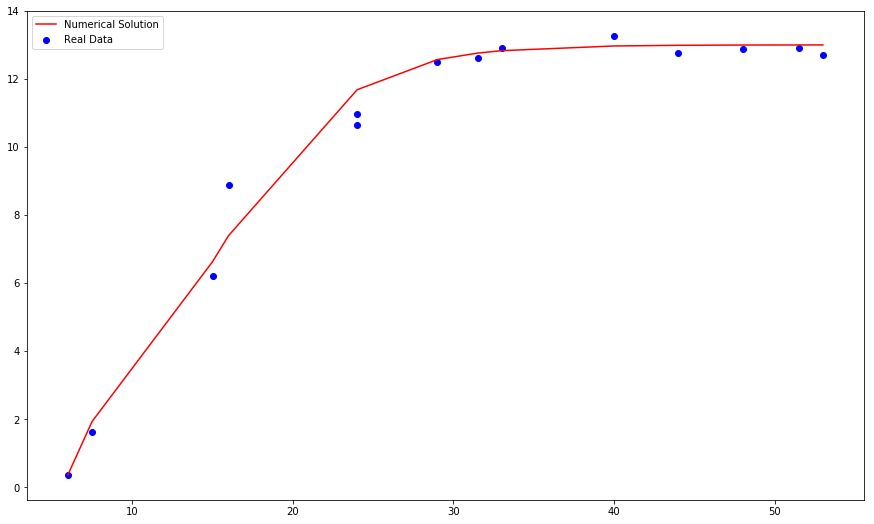

0

In [9]:
############################################################################################
#   Author:             Jeffery Summers
#   Purpose:            Use simulated annealing to find a the parameter for the logistic
#                       equation
#
#############################################################################################
 
def cost_Calc(lst_squares_array):
    return sum(lst_squares_array)
 
def keep_Probability(cost_New,cost,T):
    try:
        ans = math.exp((cost_New - cost) / T)
    except OverflowError:
        ans = 100
    return ans
 
 
def main():
    rand.seed(1)
 
    # Array holding our actual data
    p_Array = [0.37, 1.63, 6.2, 8.87, 10.66, 10.97, 12.5, 12.6, 12.9, 13.27, 12.77, 12.87, 12.9, 12.7]
    t_Array = [6, 7.5, 15, 16, 24, 24, 29, 31.5, 33, 40, 44, 48, 51.5, 53]
    # Let the parameter 'r' be initialized to 1
    r = 0.5
    # The capacity of the population, 'k' is 62
    k = 13
    # Initialize the array for the solution of the logistic differential equation
    y = [0.37]
 
    # Filling the y array
    for i in range(1,14):
        y.append(k*y[0]/((k-y[0])*math.exp((-1)*r*t_Array[i])+y[0]))
    #print(y)
    # Initializing the Least Squares Array
    lst_Squares_Array = []
    for j in range(0, 14):
        lst_Squares_Array.append((y[j]-p_Array[j])**2)
 
    # defining the cost function that needs to be minimized
    cost = cost_Calc(lst_Squares_Array)
 
    cost_Array = []
    cost_Array.append(cost)
 
    # Initializing the r array
    r_Array = [r]
 
    # This is the primary section that performs the simulated annealing
    # Initialize temperature
    T = 10
    rand.seed(10)
 
 
 
    for i in range(2, 50):
        for g in range(0,1000):
            lst_Squares_Array_temp = []
            r = rand.random()
            ytemp = []
            ytemp.append(y[0])
            for l in range(1, 14):
                ytemp.append(k * y[0] / ((k - y[0]) * math.exp((-1) * r * t_Array[l]) + y[0]))
 
            for j in range(0, 14):
                lst_Squares_Array_temp.append( (ytemp[j] - p_Array[j]) ** 2)
 
            cost_New = cost_Calc(lst_Squares_Array_temp)
            prob = keep_Probability(cost_New, cost, T)
            #print(prob)
            if cost_New < cost:
                cost = cost_New
            elif prob > rand.random():
                cost = cost_New
 
            r_Array.append(r)
            cost_Array.append(cost)
 
        T = T-T*0.1
    print('Average = ', np.mean(cost_Array))
    print('Max = ', np.max(cost_Array))
    #plt.plot(cost_Array)
    #plt.show()
    index = int(cost_Array.index(min(cost_Array)))
    #print(len(cost_Array))
    print(r_Array[index])
    r = r_Array[index]
    soln = [y[0]]
 
    for i in range(1,14):
        soln.append(k*y[0]/((k-y[0])*math.exp((-1)*r*t_Array[i])+y[0]))
 
    plt.plot(t_Array,soln,color='red', label='Numerical Solution')
    plt.scatter(t_Array,p_Array,color='blue', label='Real Data')
    plt.legend()
    plt.show()
    return 0;
 
main()

## Project 6: Pendulum  

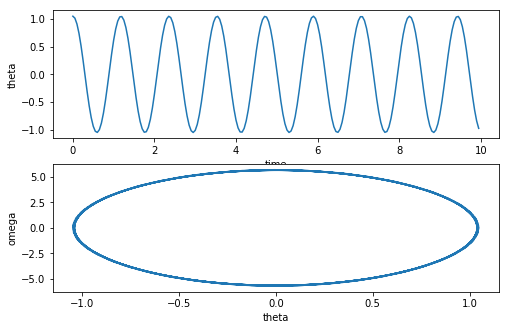

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Solve mL theta''(t) + mgsin(theta(t)) = 0
# a = mL, b = mg

a = .2*.3
b = .2*9.81
theta0 = np.pi/3
omega0 = 0 # theta'(t)

def f(y, t, params):
    theta, omega = y
    a, b = params
    deriv = [omega, -b*np.sin(theta)/a]
    return deriv

tStop = 10.
tInc = 0.05
t = np.arange(0., tStop, tInc)

params = [a, b]
y0 = [theta0, omega0]

sol = odeint(f, y0, t, args=(params,))


fig = plt.figure(1, figsize=(8,8))
ax1 = fig.add_subplot(311)
ax1.plot(t, sol[:,0])
ax1.set_xlabel('time')
ax1.set_ylabel('theta')

ax2 = fig.add_subplot(312)
ax2.plot(sol[:,0], sol[:,1])
ax2.set_xlabel('theta')
ax2.set_ylabel('omega')
plt.show()

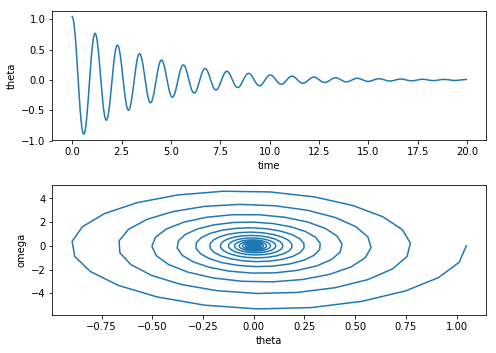

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Solve mL\theta''(t) + cL\theta'(t) + mg\sin(\theta(t)) = 0
# omega = \theta'(t)

g = 9.81
c = 0.1
L = 0.3
m = 0.2

theta0 = np.pi/3.0
omega0 = 0

def f(y, t, params):
    theta, omega = y
    g, c, L, m = params
    deriv = [omega, -c*omega/m - np.sin(theta)*g/L]
    return deriv

params = [g, c, L, m]

y0 = [theta0, omega0]

tStop = 20.
tInc = 0.05
t = np.arange(0., tStop, tInc)

sol = odeint(f, y0, t, args=(params,))

fig = plt.figure(1, figsize=(7,7))

# Plot theta as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(t, sol[:,0])
ax1.set_xlabel('time')
ax1.set_ylabel('theta')

# Plot omega vs theta
ax3 = fig.add_subplot(312)
ax3.plot(sol[:,0], sol[:,1])
ax3.set_xlabel('theta')
ax3.set_ylabel('omega')

plt.tight_layout()
plt.show()

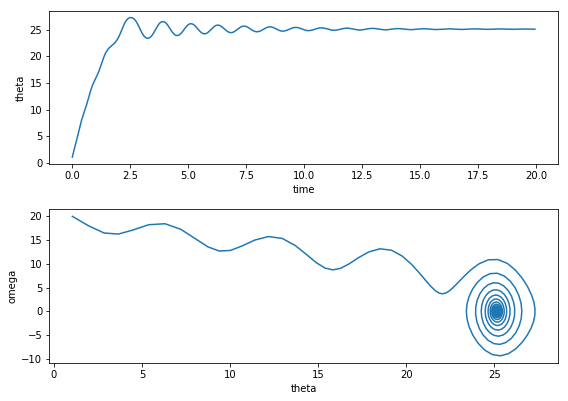

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Solve mL\theta''(t) + cL\theta'(t) + mg\sin(\theta(t)) = 0
# omega = \theta'(t)

g = 9.81
c = 0.1
L = 0.3
m = 0.2

theta0 = np.pi/3.0
omega0 = 20

def f(y, t, params):
    theta, omega = y
    g, c, L, m = params
    deriv = [omega, -c*omega/m - np.sin(theta)*g/L]
    return deriv

params = [g, c, L, m]

y0 = [theta0, omega0]

tStop = 20.
tInc = 0.05
t = np.arange(0., tStop, tInc)

sol = odeint(f, y0, t, args=(params,))

fig = plt.figure(1, figsize=(8,8))

# Plot theta as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(t, sol[:,0])
ax1.set_xlabel('time')
ax1.set_ylabel('theta')

# Plot omega vs theta
ax3 = fig.add_subplot(312)
ax3.plot(sol[:,0], sol[:,1])
ax3.set_xlabel('theta')
ax3.set_ylabel('omega')

plt.tight_layout()
plt.show()

## Project 7: Kinetics - Chemical Reaction

Is training required? 1 for yes, 0 for no: 0
Current values and output:
K value: 43.36353691 
u0 value: 0.039


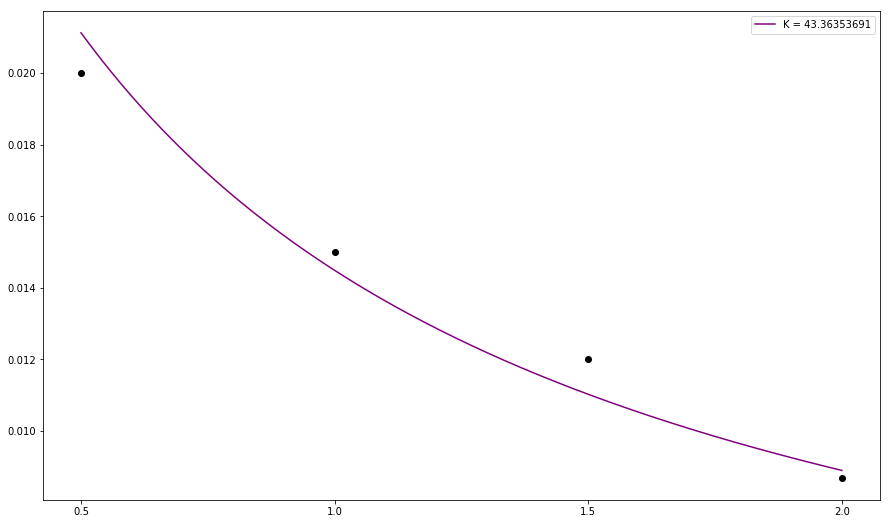

In [12]:
#Author:  Ryan Florida
#Purpose: This is a program template that will fit a curve to any data
#         set using the method of gradient descent. Note that this program does
#         require that you make a .csv file containing your data. The format of
#         the file is specified in the ReadFile function (#1) below. Also be
#         aware that this program will optimize the curve for all three
#         parameters: the carrying capacity, the steepness of the curve, and
#         the initial population. If there is a parameter that you do not wish
#         to optimize, then the easiest thing to do would be to hardcode your
#         value for that right before the final plot is generated. Be aware
#         that some data sets may require multiple training sessions.
 
'''* * * * * * * * * * * * * * * READ THIS * * * * * * * * * * * * * * * * * * *
IMPORTANT: If you train your data multiple times, make sure to back up your
input file if it has valuable parameters that you like because training and
accepting the new data will overwrite your old data file.
'''
 
#Change train rate here for convenience.
TRAIN_RATE = 1e-11
 
#******************************************************************************
#0: Main.
def main():
    #Fill data arrays.
    x, y, K, u0, fileName = ReadFile()
 
    #Logistic function.
    Fxn = lambda t : u0/(u0*K*t + 1)
 
    #Check if training is necessary, if so then the data will be trained.
    if int(input("Is training required? 1 for yes, 0 for no: ")):
        e1 = Error(x,y,Fxn)
        Train(x, y, K, u0, Fxn, fileName, e1)
 
    else:
        #Plot Fxn.
        print("Current values and output:\nK value:", K, "\nu0 value:", u0)
        plot(x, Fxn, K, 0, 1)
 
#******************************************************************************
#1: Read in user-selected file to initialize arrays.
'''
Note that, at present, this program is only designed to handle 2-tuples
of data.
*******************GENERIC FILE FORMAT (should be a .csv) below*****************
K, u0
val_00, val_01
val_10, val_11
val_20, val_21
.
.
.
Val_N0, val_N1
'''
def ReadFile():
    x = []
    y = []
    fileName = 'kinetics_data.csv'
    inFile = open(fileName, 'r')
    old_data = inFile.readline()
    K, u0 = old_data.split(sep = ',')
    K, u0 = float(K), float(u0)
    for line in inFile:
        vals = line.split(sep = ',')
        x.append(float(vals[0]))
        y.append(float(vals[1]))
    x = array(x)
    y = array(y)
    plot(x,y,K,1)
    inFile.close()
    return x, y, K, u0, fileName
 
#******************************************************************************
#2: Calculate sum of squares error.
def Error(x, y, Fxn, new=0):
    y_p = array([Fxn(x_i) for x_i in x])
    error = 0.0
    for i in range(len(y)):
        error += (y[i]-y_p[i])**2
    if new:
        print("Ending Error:", error)
    else:
        print("Beginning Error:", error)
    return error
 
#******************************************************************************
#3: Trains parameters so that Fxn curve will fit the data.
def Train(x, y, K, u0, Fxn, fileName, e1, double=0):
    '''
    The arguments in the function, in the order they appear, are the x-values,
    the y-values, the carrying capacity, the initial population, the steepness
    of the curve, the Fxn function itself, the name of the file from which
    the data are read, the error associated with the data before any training
    has been done, and if the gradient should optimize all three parameters. If
    you would only like to optimize two parameters, namely K and r, then change
    change double to 0 here.
    '''
    print("Training ...")
    #Speed at which the algorithm will train.
    #Slower rate => better results and longer computation time.
    #If you have a particularly unruly data set, you may want to change this
    #to a value of 1e-1 or 1 until the curve becomes somewhat well-behaved.
    train_rate     = TRAIN_RATE
 
    #Training phase.
    pound = 0
    if double:
        for i in range(int(3e5) + 1):
            w8_1, w8_2       = GetWeights(x, y, K, u0, double)
            K               -= train_rate*w8_1
            u0              -= train_rate*w8_2
            if i%1e4 == 0 and i != 0:
                percent = i/3e5
                pound += 1
                print('['+'#'*pound + ' '*(30-pound) + ']',\
                        "{:2.1%}".format(percent), end='\r' )
                if i%1e5 == 0:
                    train_rate /= 10
    else:
        for i in range(int(3e5) + 1):
            w8_1             = GetWeights(x, y, K, u0)
            K               -= train_rate*w8_1
            if i%1e4 == 0 and i != 0:
                percent = i/3e5
                pound += 1
                print('['+'#'*pound + ' '*(30-pound) + ']',\
                        "{:2.1%}".format(percent), end='\r' )
                if i%1e5 == 0:
                    train_rate /= 10
    print()
 
    Fxn = lambda t : u0/(u0*K*t + 1)
    print("\n***********************Training Complete!***********************")
 
    #Display values for user.
    print("\nK value:", K, "u0 value:", u0)
    print('*'*64)
    e2 = Error(x, y, Fxn, 1)
    delta_E = e2 - e1
    print("Change in error:", delta_E)
    if delta_E > 0:
        print("NOTE: ERROR HAS INCREASED")
    plot(x, Fxn, K, 0, 1)
#     replace = int(input("Are the values sufficient? 1 for yes, 0 for no: "))
#     if replace:
#         OverwriteFile(fileName, K, u0)
 
#******************************************************************************
#1.1: Plot data points and functions.
def plot(x_vals, y_vals, K, scatter=0, show=0):
    plt.xticks(x_vals, x_vals, rotation = 'horizontal')
    if scatter:
        plt.plot(x_vals, y_vals,'ko')
    else:
        X = linspace(min(x_vals), max(x_vals), 300)
        Y = array([y_vals(x) for x in X])
        plt.plot(X, Y, 'purple', label = 'K = %.8f' %K)
        plt.legend()
    if show:
        plt.show()
 
#******************************************************************************
#3.1: Calculate weights for curve fitting.
def GetWeights(x, y, K, u0, double=0):
    w8_1 = 0
    if double:
        w8_2 = 0
        for i in range(1, len(x)):
            par_K, par_u0 = Gradient(x[i], y[i], K, u0, double)
            w8_1 += par_K
            w8_2 += par_u0
        return w8_1, w8_2
    else:
        for i in range(1, len(x)):
            par_K = Gradient(x[i], y[i], K, u0)
            w8_1 += par_K
        return w8_1
 
#******************************************************************************
# #3.2: Overwrites file with new parameters.
# def OverwriteFile(fileName, K, u0):
#     K, u0        = str(K), str(u0)
#     read         = open(fileName, 'r')
#     trash        = read.readline()
#     data_to_keep = read.readlines()
#     read.close()
#     overwrite    = open(fileName, 'w')
#     overwrite.write(K + ', ' + u0 + '\n')
#     for line in data_to_keep:
#         overwrite.write(line)
#     overwrite.close()
#     print("File successfully updated")
 
#******************************************************************************
#3.1.1: Return gradient
def Gradient(t, y, K, u0, double=0):
 
    par_K = -u0 ** 2 / (u0 * K * t + 1) ** 2 * t
 
    if double:
        par_u0 = 1 / (u0 * K * t + 1) - u0 / (u0 * K * t + 1) ** 2 * K * t
        return par_K, par_u0
    else:
        return par_K
 
#******************************************************************************
#Call main.
main()

43.54840845325572


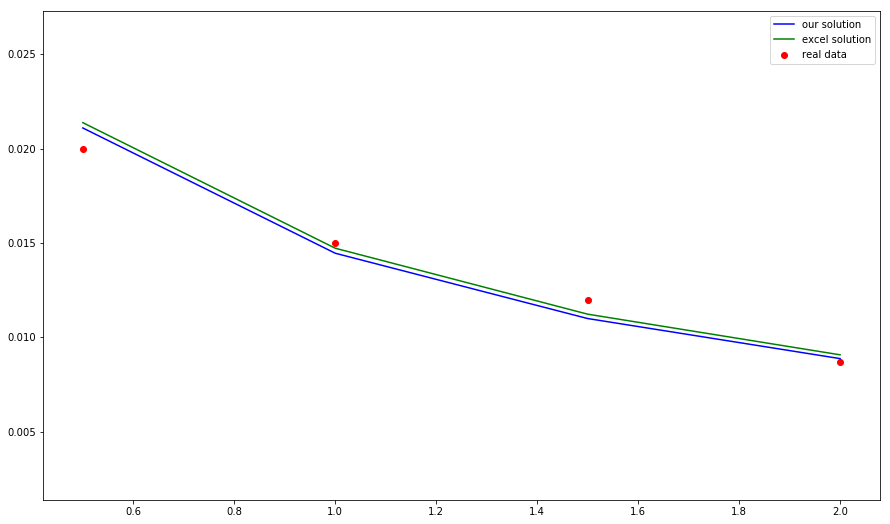

In [13]:
#Puran
#k = 43.3635683507
 
time = [0.5, 1, 1.5, 2.0]
mol = [0.02, 0.015, 0.012, 0.0087]
y0 = 0.039
k = 40.28
cost_array = []
k_array = [k]
 
 
def least_square_dif(y_init, k_init, time_array, data_array):
    least_square = []
    i = 0
    while i < len(time_array):
        least_square.append(((y_init/ (y_init*k_init*time_array[i] + 1)) - data_array[i])**2)
        i+=1
    return sum(least_square)    
 
cost = least_square_dif(y0, k, time, mol)
cost_array.append(cost)
 
temp = []
for i in range(100):
    k = rand.uniform(40.0, 100.0)
    cost = least_square_dif(y0, k, time, mol)
    cost_array.append(cost)
    k_array.append(k)
     
index = cost_array.index(min(cost_array))
min_k = k_array[index]
 
def solution(t_array, k_min, y_init):
    sol = []
    count = 0
    while count < len(t_array):
        sol.append((y_init/ (y_init*k_min*t_array[count] + 1)))
        count += 1
    return sol
 
 
print(min_k)
our_solution = solution(time, min_k, y0)
excel_solution = solution(time, 42.299, y0)
 
 
plt.scatter(time, mol, color="red", label="real data")
plt.plot(time, our_solution, color="blue", label="our solution")
plt.plot(time, excel_solution, color="green", label="excel solution")
plt.legend()
plt.show()